# Time Series with Pandas, Including Visualization

## The Data

Work with a modified version of weather data from London from Kaggle.

Full dataset here: https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

Modified dataset here: https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv

## The Task

1. Convert the date column to datetime dtype. Double-check the result. Is it what you expected? If not, be sure to correct it by entering the appropriate format!

2. Set the date column as the index. Inspect the new index of your dataframe. What type of index is it? Does it have a frequency?

3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
        
4. Answer the following questions using .idxmax() and .idxmin(), print statements, and the .strftime() method. Use f-strings to print the following statements (with the blanks filled in):
    - a) "The lowest temperature of {max temp} degrees occurred on {date as "MonthName 2-digit-day, 4-digit year}, which was a {day of the week}."
    - b) "The highest daily precipitation of {max preciptation} inches occurred on {date as "MonthName 2-digit-day, 4-digit year}, which was a {day of the week}."

5. Impute any missing values.

6. Plot the mean, min, and max temps for 2018-2020 on one figure.
  - Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
    - Set the title to "Daily Temperature"
    - Set the ylabel to "Degrees"
    - Customize the major xaxis ticks to:
      - Have major xaxis ticks every 1 year.
      - Use 4-digit years for the labels
      - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
      - Have minor xaxis ticks every 3 months
      - Use 3-letter month names for the labels.
   - Your final figure should look something like the image below.

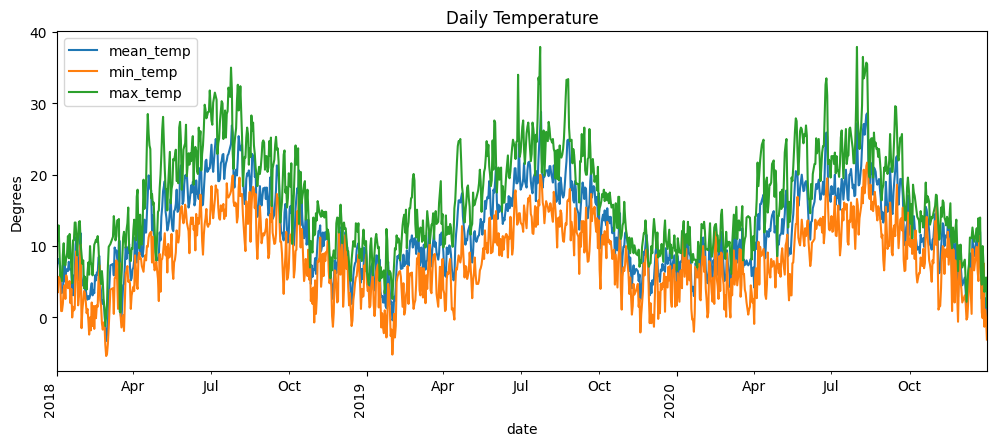

7. Plot the precipitation and snow depth for 2000-2020.
  - Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
    - With the title of "Daily Precipitation"
    - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
      - Have major xaxis ticks every 5 years.
      - Use 4-digit years for the labels
      - Rotate the major ticks' labels 45 degrees.
    - Customize the minor xaxis ticks to:
      - Have minor xaxis ticks every 3 months
      - Do not label the minor ticks on the x-axis.
  - Your final figure should look something like the image below.

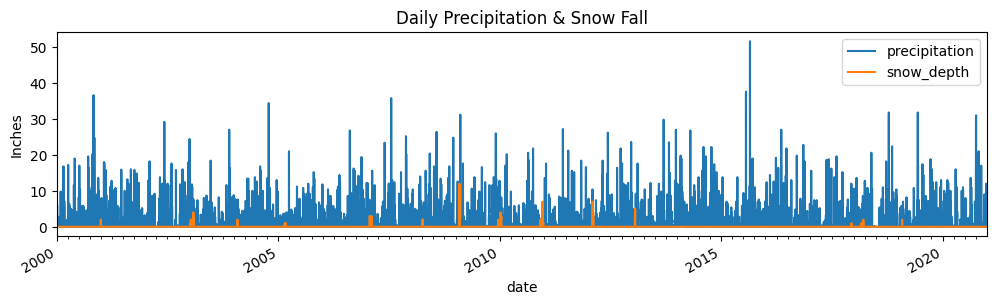

# 0 Preliminary Steps

In [26]:
# imports
import pandas as pd
import datetime as dt
from matplotlib import dates as mdates

In [3]:
# load data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv')

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


'date' column has dates in format: 4-digit year, 2-digit month, and 2-digit day (all together, no spaces).

# 1 Convert the date column to datetime dtype

In [4]:
# convert column to new column of datetime objects
df['datetime'] = pd.to_datetime(df['date'])

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1970-01-01 00:00:00.019790101
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1970-01-01 00:00:00.019790102
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1970-01-01 00:00:00.019790103
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1970-01-01 00:00:00.019790104
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1970-01-01 00:00:00.019790105


In [5]:
# correct the formatting
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [6]:
# apply transformation to 'date' column and drop 'datetime'
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.drop(columns = 'datetime', inplace = True)

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# 2 Set the date column as the index

Inspect the new index of your dataframe. What type of index is it? Does it have a frequency?

In [7]:
# set index on 'date' column
df = df.set_index('date')

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       14938 non-null  float64
 1   sunshine          14957 non-null  float64
 2   global_radiation  14939 non-null  float64
 3   max_temp          14951 non-null  float64
 4   mean_temp         14922 non-null  float64
 5   min_temp          14955 non-null  float64
 6   precipitation     14951 non-null  float64
 7   pressure          14953 non-null  float64
 8   snow_depth        13589 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
# check type of index
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

The index is a datetime dtype index. The frequency is daily.

# 3 Filter out only the required data

- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

In [9]:
# check columns
df.columns

Index(['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [10]:
# filter for year 2000 and later
filtered_df = df.loc['2000':]

# drop unnecessary variables
filtered_df = filtered_df.drop(columns = ['cloud_cover',
                                         'sunshine',
                                         'global_radiation',
                                         'pressure'])

# # alternate code
# filtered_df = filtered_df.loc['2000':, ['precipitation',
#                                        'mean_temp',
#                                        'min_temp',
#                                        'max_temp',
#                                        'snow_depth']]

# check
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [11]:
# check min and max dates in index
max_date = filtered_df.index.max()
min_date = filtered_df.index.min()

# check
print(max_date, min_date)

2020-12-31 00:00:00 2000-01-01 00:00:00


# 4 Answer the following questions

Use .idxmax() and .idxmin(), print statements, and the .strftime() method. Use f-strings to print the following statements (with the blanks filled in).

## 4.1 Expression A

"The lowest temperature of {min temp} degrees occurred on {date as "MonthName 2-digit-day, 4-digit year}, which was a {day of the week}."

In [12]:
# find lowest min temp and get row
min_temp_index = filtered_df['min_temp'].idxmin()

# check
min_temp_index

Timestamp('2010-12-20 00:00:00')

In [13]:
# get row from index
min_temp_row = filtered_df.loc[min_temp_index]

# check
min_temp_row

max_temp         1.8
mean_temp       -4.1
min_temp        -9.4
precipitation    0.0
snow_depth       5.0
Name: 2010-12-20 00:00:00, dtype: float64

In [14]:
# unpack variables
max_temp, mean_temp, min_temp, precipitation, snow_depth = filtered_df.loc[min_temp_index]

# check
print(max_temp, mean_temp, min_temp, precipitation, snow_depth)

1.8 -4.1 -9.4 0.0 5.0


In [15]:
# construct print statement
print(f"The lowest temperature of {min_temp} degrees \
occurred on {min_temp_index.strftime('%B %d, %Y')}, which \
was a {min_temp_index.strftime('%A')}.")

The lowest temperature of -9.4 degrees occurred on December 20, 2010, which was a Monday.


## 4.2 Expression B

"The highest daily precipitation of {max preciptation} inches occurred on {date as "MonthName 2-digit-day, 4-digit year}, which was a {day of the week}."

In [16]:
# find highest daily precipitation and get row
max_precip_index = filtered_df['precipitation'].idxmax()

# check
max_precip_index

Timestamp('2015-08-26 00:00:00')

In [17]:
# get row from index
max_precip_row = filtered_df.loc[max_precip_index]

# check
max_precip_row

max_temp         19.6
mean_temp        17.0
min_temp         14.1
precipitation    51.6
snow_depth        0.0
Name: 2015-08-26 00:00:00, dtype: float64

In [18]:
# unpack variables
max_temp, mean_temp, min_temp, precipitation, snow_depth = filtered_df.loc[max_precip_index]

# check
print(max_temp, mean_temp, min_temp, precipitation, snow_depth)

19.6 17.0 14.1 51.6 0.0


In [19]:
# construct print statement
print(f"The highest daily precipitation of {precipitation} \
inches occurred on {max_precip_index.strftime('%B %d, %Y')}, which \
was a {max_precip_index.strftime('%A')}.")

The highest daily precipitation of 51.6 inches occurred on August 26, 2015, which was a Wednesday.


# 5 Impute any missing values

In [21]:
# check missing values
filtered_df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

For the temperature features, interpolation makes sense. For precipitation and snow depth, though, it does not. Instead we will impute 0 as a stand-in for the missing data in those columns.

In [22]:
# temperature features: interpolate
filtered_df['min_temp'] = filtered_df['min_temp'].interpolate()
filtered_df['mean_temp'] = filtered_df['mean_temp'].interpolate()
filtered_df['max_temp'] = filtered_df['max_temp'].interpolate()

In [23]:
# precipitation and snow depth: impute 0
filtered_df['precipitation'] = filtered_df['precipitation'].fillna(0)
filtered_df['snow_depth'] = filtered_df['snow_depth'].fillna(0)

In [25]:
# check
filtered_df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

# 6 Plot the mean, min, and max temps for 2018-2020 on one figure

  - Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
    - Set the title to "Daily Temperature"
    - Set the ylabel to "Degrees"
    - Customize the major xaxis ticks to:
      - Have major xaxis ticks every 1 year.
      - Use 4-digit years for the labels
      - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
      - Have minor xaxis ticks every 3 months
      - Use 3-letter month names for the labels.

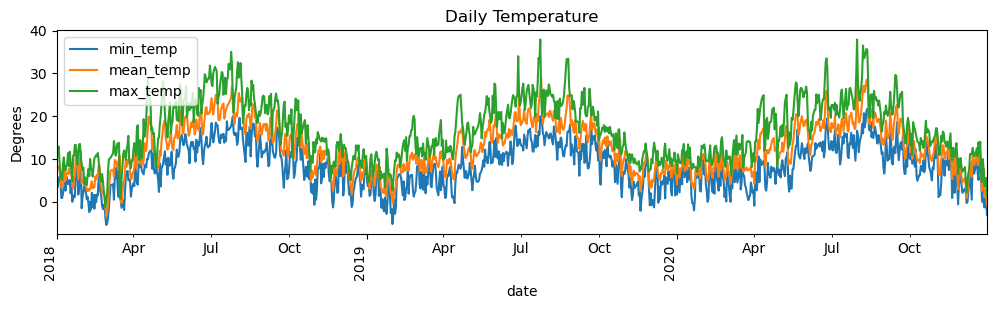

In [28]:
# put temperature data into one df
plot_df = filtered_df.loc['2018':'2020', ['min_temp',
                                         'mean_temp',
                                         'max_temp']]

# plot data; set figsize
ax = plot_df.plot(figsize = (12, 3))

# set title and y-axis label
ax.set(title = 'Daily Temperature', 
       ylabel = 'Degrees')

# cusomize major x-axis ticks
# one tick every year
major_ticks_loc = mdates.YearLocator(1)
# 4-digit-year labels
major_ticks_format = mdates.DateFormatter('%Y')
# set locator and formatter
ax.xaxis.set_major_locator(major_ticks_loc)
ax.xaxis.set_major_formatter(major_ticks_format)

# customize minor x-axis ticks
# one tick every 3 months
minor_ticks_loc = mdates.MonthLocator(interval = 3)
# 3-letter month abbreviation for labels
minor_ticks_format = mdates.DateFormatter('%b')
# set locator and formatter
ax.xaxis.set_minor_locator(minor_ticks_loc)
ax.xaxis.set_minor_formatter(minor_ticks_format)

# get figure for autoformat_xdate and rotating years
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major',
                 rotation = 90)

# 7 Plot the precipitation and snow depth for 2000-2020

  - Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
    - With the title of "Daily Precipitation"
    - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
      - Have major xaxis ticks every 5 years.
      - Use 4-digit years for the labels
      - Rotate the major ticks' labels 45 degrees.
    - Customize the minor xaxis ticks to:
      - Have minor xaxis ticks every 3 months
      - Do not label the minor ticks on the x-axis.

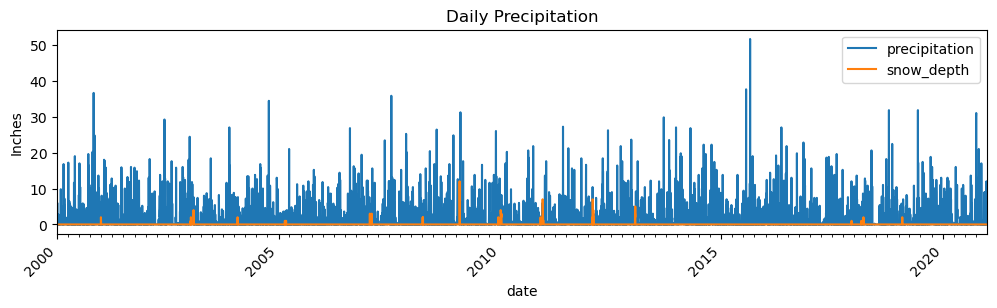

In [30]:
# put precipitation and snow depth data into one df
plot_df = filtered_df.loc['2000':'2020', ['precipitation',
                                         'snow_depth']]

# plot data; set figsize
ax = plot_df.plot(figsize = (12, 3))

# set title and y-axis label
ax.set(title = 'Daily Precipitation', 
       ylabel = 'Inches')

# cusomize major x-axis ticks
# one tick every year
major_ticks_loc = mdates.YearLocator(5)
# 4-digit-year labels
major_ticks_format = mdates.DateFormatter('%Y')
# set locator and formatter
ax.xaxis.set_major_locator(major_ticks_loc)
ax.xaxis.set_major_formatter(major_ticks_format)

# customize minor x-axis ticks
# one tick every 3 months
minor_ticks_loc = mdates.MonthLocator(interval = 3)
# no minor tick labels
# set locator (no formatter)
ax.xaxis.set_minor_locator(minor_ticks_loc)

# get figure for autoformat_xdate and rotating years
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major',
                 rotation = 45)